<a href="https://colab.research.google.com/github/RCharissa/UAS_SIG_Prediksi-Rawan-Banjir-Kota-Bengkulu/blob/main/UAS_GIS_R_Charissa_(G1A022015).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# --- 1. Instalasi dan Impor Library ---
!pip install geopandas rasterio contextily shapely

import geopandas as gpd
import pandas as pd
import rasterio
import rasterio.mask
import matplotlib.pyplot as plt
import numpy as np
import contextily as ctx
from shapely.geometry import box

In [13]:
# --- 2. Upload File ---
from google.colab import files
uploaded = files.upload()
# Upload semua file terkait: CSV, .tif, .shp, .shx, .dbf, dll.

Saving Curah_Hujan_Bersih_Kota_Bengkulu.csv to Curah_Hujan_Bersih_Kota_Bengkulu (1).csv
Saving Pembagian_Lahan_Kota_Bengkulu (1).csv to Pembagian_Lahan_Kota_Bengkulu (1) (1).csv


In [16]:
df = pd.read_csv("Pembagian_Lahan_Kota_Bengkulu (1) (1).csv")
print("Kolom tersedia:", df.columns)

import numpy as np
np.random.seed(42)
df["Curah Hujan"] = np.random.choice([0, 1], size=len(df))

Kolom tersedia: Index(['Kecamatan', 'Lahan Terbangun (Ha)', 'Lahan Non-Terbangun (Ha)',
       'Lahan Sawah/Perkebunan (Ha)', 'Total Luas (Ha)'],
      dtype='object')


In [27]:
X = df[['Lahan Terbangun (Ha)', 'Lahan Non-Terbangun (Ha)', 'Lahan Sawah/Perkebunan (Ha)'
    ]]
y = df['Curah Hujan']

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# --- Model ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Hitung probabilitas prediksi
y_proba = model.predict_proba(X_test)[:, 1] # Ambil probabilitas kelas positif

threshold = 0.3  # contoh threshold lebih rendah dari 0.5
y_pred_custom = (y_proba >= threshold).astype(int)

# Impor fungsi evaluasi dari sklearn.metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

print(f"\nEvaluasi dengan threshold {threshold}:")
print(f"Accuracy  : {accuracy_score(y_test, y_pred_custom):.3f}")
print(f"Precision : {precision_score(y_test, y_pred_custom, zero_division=0):.3f}")
print(f"Recall    : {recall_score(y_test, y_pred_custom):.3f}")
print(f"F1 Score  : {f1_score(y_test, y_pred_custom):.3f}")
print(f"ROC AUC   : {roc_auc_score(y_test, y_proba):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom, zero_division=0))


Evaluasi dengan threshold 0.3:
Accuracy  : 0.500
Precision : 0.000
Recall    : 0.000
F1 Score  : 0.000
ROC AUC   : 0.500

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



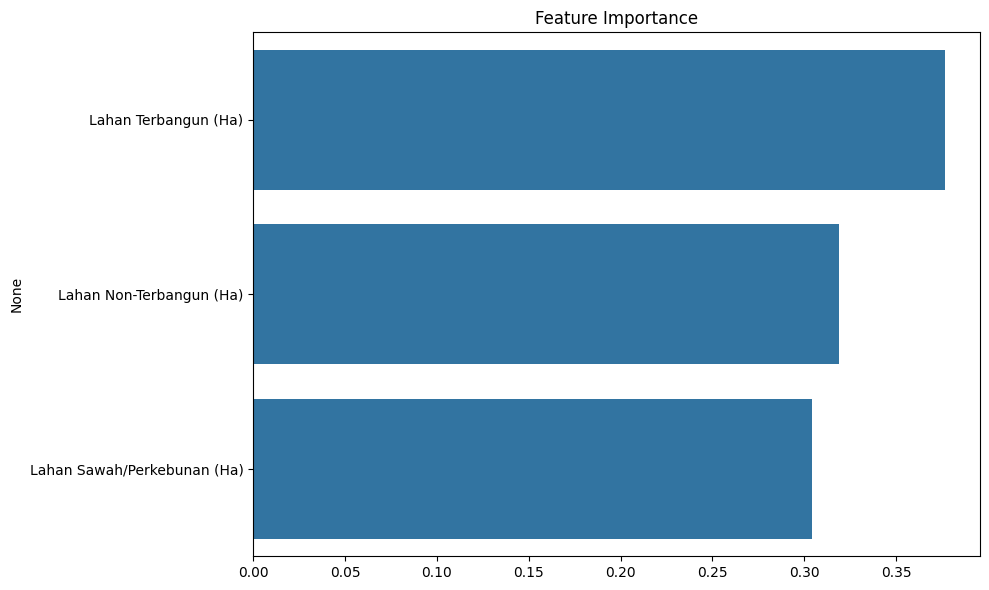

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
importances = model.feature_importances_
feat_names = X.columns
plt.figure(figsize=(10,6))
# Tambahkan impor seaborn di sini
import seaborn as sns
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

df['Prediksi Banjir'] = model.predict(X)

# --- Simpan hasil prediksi ---
# Ubah 'Kabupaten/Kota' menjadi 'Kecamatan' sesuai dengan nama kolom di DataFrame
output = df[['Kecamatan', 'Prediksi Banjir']]
output.to_csv("prediksi_banjir_kota_bengkulu.csv", index=False)
files.download("prediksi_banjir_kota_bengkulu.csv")

In [48]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
from google.colab import files

uploaded = files.upload()
zip_filename = list(uploaded.keys())[0]

extract_dir = "Shapefile_BKL"
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

def find_shp(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.shp'):
                return os.path.join(root, file)
    return None

shp_path = find_shp(extract_dir)
assert shp_path is not None, "File .shp tidak ditemukan dalam ZIP!"

gdf = gpd.read_file(shp_path)
print("Kolom tersedia dalam shapefile:", gdf.columns)

print("Upload file prediksi_banjir_kota_bengkulu.csv")
uploaded = files.upload()
df_pred = pd.read_csv("prediksi_banjir_kota_bengkulu.csv")
print(df_pred)

Saving Shapefile_BKL.zip to Shapefile_BKL (2).zip
Kolom tersedia dalam shapefile: Index(['KDPPUM', 'NAMOBJ', 'REMARK', 'KDPBPS', 'FCODE', 'LUASWH', 'UUPP',
       'SRS_ID', 'LCODE', 'METADATA', 'KDEBPS', 'KDEPUM', 'KDCBPS', 'KDCPUM',
       'KDBBPS', 'KDBPUM', 'WADMKD', 'WIADKD', 'WADMKC', 'WIADKC', 'WADMKK',
       'WIADKK', 'WADMPR', 'WIADPR', 'TIPADM', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')
Upload file prediksi_banjir_kota_bengkulu.csv


Saving prediksi_banjir_kota_bengkulu.csv to prediksi_banjir_kota_bengkulu (1).csv
          Kecamatan  Prediksi Banjir
0           Selebar                0
1    Kampung Melayu                0
2    Gading Cempaka                0
3        Ratu Agung                0
4       Ratu Samban                0
5      Teluk Segara                1
6      Sungai Serut                0
7  Muara Bangkahulu                0
8      Jumlah Total                0


In [50]:
print("Upload file prediksi_banjir_kota_bengkulu.csv")
uploaded = files.upload()
df_pred = pd.read_csv("prediksi_banjir_kota_bengkulu.csv")
print(df_pred)

Upload file prediksi_banjir_kota_bengkulu.csv


Saving prediksi_banjir_kota_bengkulu.csv to prediksi_banjir_kota_bengkulu (1).csv
          Kecamatan  Prediksi Banjir
0           Selebar                0
1    Kampung Melayu                0
2    Gading Cempaka                0
3        Ratu Agung                0
4       Ratu Samban                0
5      Teluk Segara                1
6      Sungai Serut                0
7  Muara Bangkahulu                0
8      Jumlah Total                0


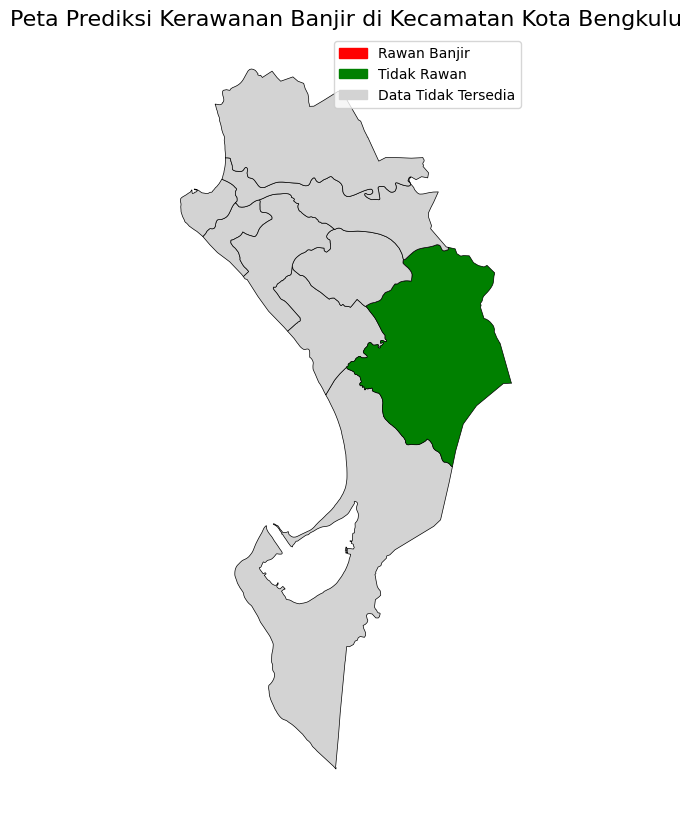

In [54]:
def clean_name(name):
    # Ensure name is a string before applying string methods
    if isinstance(name, str):
        name = name.lower()
        # Remove "kabupaten" or "kota" and strip whitespace
        name = name.replace('kabupaten ', '').replace('kota ', '').strip()
        # Correct specific known inconsistencies if needed
        # The line below was causing the error and is removed.
        # name = name.replace()
        return name
    # Return original value if not a string (e.g., NaN)
    return name

# Clean the 'Kecamatan' column in the prediction DataFrame
# Ensure the column name matches the CSV output
df_pred['Kecamatan_Clean'] = df_pred['Kecamatan'].apply(clean_name)
print(gdf.columns)

# Clean the column in the GeoDataFrame that contains Kecamatan names.
# Assuming 'NAMOBJ' contains the Kecamatan names in the shapefile.
# You might need to inspect gdf.columns to confirm the correct column name.
# Replace 'NAMOBJ' with the actual column name if it's different.
gdf['Kecamatan_Clean'] = gdf['NAMOBJ'].apply(clean_name)

# Merge the GeoDataFrame with the cleaned prediction DataFrame
# Merge using the cleaned Kecamatan names
gdf_merged = gdf.merge(df_pred, how='left', left_on='Kecamatan_Clean', right_on='Kecamatan_Clean')

# Apply color mapping based on 'Prediksi Banjir'
gdf_merged['warna'] = gdf_merged['Prediksi Banjir'].map({1: 'red', 0: 'green'})
# Fill NaN values (for unmatched areas) with lightgrey
gdf_merged['warna'] = gdf_merged['warna'].fillna('lightgrey')

# Create the plot
fig, ax = plt.subplots(figsize=(12, 10))
gdf_merged.plot(ax=ax, color=gdf_merged['warna'], edgecolor='black', linewidth=0.5) # Added linewidth for better visibility

# Import matplotlib.patches for the legend
import matplotlib.patches as mpatches
legend_labels = [
    mpatches.Patch(color='red', label='Rawan Banjir'),
    mpatches.Patch(color='green', label='Tidak Rawan'),
    mpatches.Patch(color='lightgrey', label='Data Tidak Tersedia')
]
plt.legend(handles=legend_labels)
plt.title("Peta Prediksi Kerawanan Banjir di Kecamatan Kota Bengkulu", fontsize=16) # Changed title to Kecamatan
plt.axis('off')
plt.show()


Kolom di DataFrame Prediksi: Index(['Kecamatan', 'Prediksi Banjir', 'Kecamatan_Clean'], dtype='object')
Kolom di GeoDataFrame: Index(['KDPPUM', 'NAMOBJ', 'REMARK', 'KDPBPS', 'FCODE', 'LUASWH', 'UUPP',
       'SRS_ID', 'LCODE', 'METADATA', 'KDEBPS', 'KDEPUM', 'KDCBPS', 'KDCPUM',
       'KDBBPS', 'KDBPUM', 'WADMKD', 'WIADKD', 'WADMKC', 'WIADKC', 'WADMKK',
       'WIADKK', 'WADMPR', 'WIADPR', 'TIPADM', 'Shape_Leng', 'Shape_Area',
       'geometry', 'Kecamatan_Clean'],
      dtype='object')

Nama Kecamatan unik di data prediksi (setelah dibersihkan):
['gading cempaka', 'jumlah total', 'kampung melayu', 'muara bangkahulu', 'ratu agung', 'ratu samban', 'selebar', 'sungai serut', 'teluk segara']

Nama Kecamatan unik di data shapefile (setelah dibersihkan):
['gadingcempaka', 'kampungmelayu', 'muarabangka hulu', 'ratuagung', 'ratusamban', 'selebar', 'singaranpati', 'sungaiserut', 'teluksegara']

Area (dari shapefile) yang tidak memiliki data prediksi:
             NAMOBJ   Kecamatan_Clean
0   

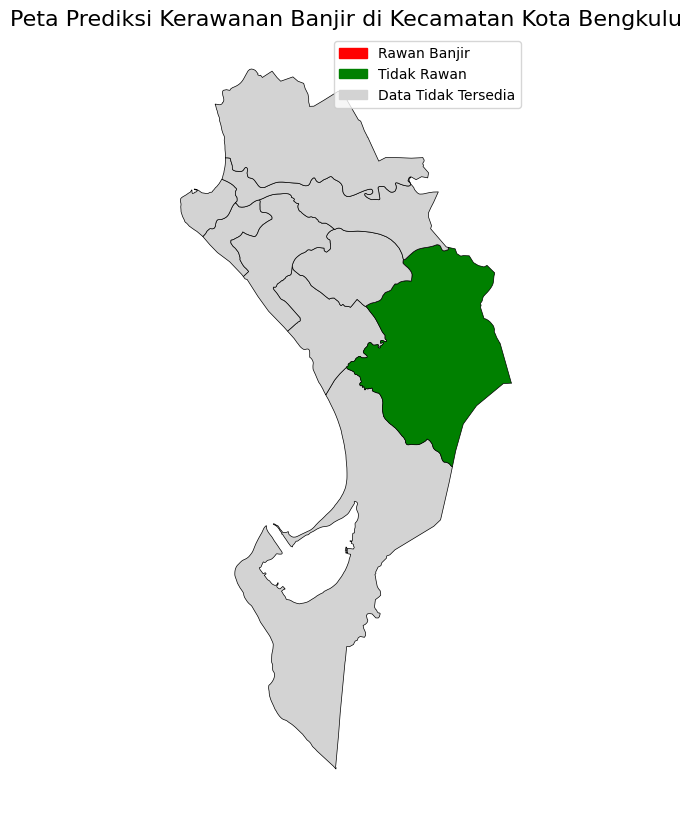

In [55]:
def clean_name(name):
    # Ensure name is a string before applying string methods
    if isinstance(name, str):
        name = name.lower()
        # Remove "kabupaten" or "kota" and strip whitespace
        name = name.replace('kabupaten ', '').replace('kota ', '').strip()
        # Correct specific known inconsistencies if needed
        # Tambahkan penanganan inkonsistensi spesifik di sini jika ditemukan
        # Contoh: name = name.replace('kecamatan xyz lama', 'kecamatan xyz baru')
        return name
    # Return original value if not a string (e.g., NaN)
    return name

# --- Diagnosis: Periksa Nama Kolom ---
print("\nKolom di DataFrame Prediksi:", df_pred.columns)
print("Kolom di GeoDataFrame:", gdf.columns) # Pastikan 'NAMOBJ' (atau nama kolom yang benar) ada di sini

# Clean the 'Kecamatan' column in the prediction DataFrame
# Ensure the column name matches the CSV output
df_pred['Kecamatan_Clean'] = df_pred['Kecamatan'].apply(clean_name)

# Clean the column in the GeoDataFrame that contains Kecamatan names.
# Assuming 'NAMOBJ' contains the Kecamatan names in the shapefile.
# You might need to inspect gdf.columns to confirm the correct column name.
# Replace 'NAMOBJ' with the actual column name if it's different.
gdf['Kecamatan_Clean'] = gdf['NAMOBJ'].apply(clean_name) # Pastikan 'NAMOBJ' adalah nama kolom yang benar

# --- Diagnosis: Bandingkan Nama Kecamatan yang Telah Dibersihkan ---
print("\nNama Kecamatan unik di data prediksi (setelah dibersihkan):")
print(sorted(df_pred['Kecamatan_Clean'].unique()))

print("\nNama Kecamatan unik di data shapefile (setelah dibersihkan):")
print(sorted(gdf['Kecamatan_Clean'].unique()))

# Merge the GeoDataFrame with the cleaned prediction DataFrame
# Merge using the cleaned Kecamatan names
gdf_merged = gdf.merge(df_pred, how='left', left_on='Kecamatan_Clean', right_on='Kecamatan_Clean')

# --- Diagnosis: Periksa Kecamatan yang Tidak Cocok (NaN) ---
# Temukan baris di gdf_merged yang 'Prediksi Banjir'nya NaN (tidak cocok saat merge)
unmatched_areas = gdf_merged[gdf_merged['Prediksi Banjir'].isna()]
print("\nArea (dari shapefile) yang tidak memiliki data prediksi:")
print(unmatched_areas[['NAMOBJ', 'Kecamatan_Clean']]) # Tampilkan nama asli dan nama bersih

# Apply color mapping based on 'Prediksi Banjir'
gdf_merged['warna'] = gdf_merged['Prediksi Banjir'].map({1: 'red', 0: 'green'})
# Fill NaN values (for unmatched areas) with lightgrey
gdf_merged['warna'] = gdf_merged['warna'].fillna('lightgrey')

# Create the plot
fig, ax = plt.subplots(figsize=(12, 10))
gdf_merged.plot(ax=ax, color=gdf_merged['warna'], edgecolor='black', linewidth=0.5) # Added linewidth for better visibility

# Import matplotlib.patches for the legend
import matplotlib.patches as mpatches
legend_labels = [
    mpatches.Patch(color='red', label='Rawan Banjir'),
    mpatches.Patch(color='green', label='Tidak Rawan'),
    mpatches.Patch(color='lightgrey', label='Data Tidak Tersedia')
]
plt.legend(handles=legend_labels)
plt.title("Peta Prediksi Kerawanan Banjir di Kecamatan Kota Bengkulu", fontsize=16) # Changed title to Kecamatan
plt.axis('off')
plt.show()